# Step 1 - Gather data

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import json
import random
%matplotlib inline

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

imagep_df = pd.read_csv('image-predictions.tsv', sep="\t")
imagep_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
imagep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
tweets_list = []
with open('tweet-json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    tweets_list.append(data)

In [7]:
tweets_df = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

In [8]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Step 2 - Accessing Dataset

In [9]:
#checking the structure of the DataFrames
twitter_archive_df.shape, imagep_df.shape, tweets_df.shape

((2356, 17), (2075, 12), (2354, 3))

## Accessing Twitter Archive

In [10]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### The following columns have missing data and since the are ids, they will be dropped
> in_reply_to_status_id and in_reply_to_user_id have 78 records
> retweeted_status_id,  retweeted_status_user_id and retweeted_status_timestamp have 181 records
> The expanded urls will also be dropped, as we have another column in imagep_df containing the image url

In [12]:
twitter_archive_df['timestamp'].sample()

1132    2016-05-07 01:37:30 +0000
Name: timestamp, dtype: object

#### This column will be converted to datetime datatype

In [13]:
twitter_archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### These rows will have to be clean to extract the text from the anchor tag

In [14]:
twitter_archive_df['text'].sample(10)

1034    This is Oliver. He's downright gorgeous as hel...
1549    This is Ferg. He swallowed a chainsaw. 1 like ...
1077    This... is a Tyrannosaurus rex. We only rate d...
1488    Please only send in dogs. Don't submit other t...
245     We usually don't rate polar bears but this one...
1518    This is Buddy. He's testing out the water. Suc...
1746    This is Louis. He's a river dancer. His friend...
123     This is Walter. He won't start hydrotherapy wi...
2222    Here is a mother dog caring for her pups. Snaz...
1024    This is Shiloh. She did not pass the soft mout...
Name: text, dtype: object

#### This column alone does not offer any stories, we will combine it with the rating numerator and denominator and see what we can find

In [15]:
#increase the width of the columns
pd.set_option('display.max_colwidth', 500)

In [16]:
twitter_archive_df[['text', 'rating_numerator', 'rating_denominator']].sample(20)

,text,rating_numerator,rating_denominator
1458,This is Lorenzo. He's educated af. Just graduated college. 11/10 poor pupper can't even comprehend his debt https://t.co/dH3GzcjCtQ,11,10
1470,This is Chester. He's a Benefloof Cumberbark. Fabulous ears. Nifty shirt. Was probably on sale. Nice hardwood. 11/10 https://t.co/YoII7tWXMT,11,10
2305,My goodness. Very rare dog here. Large. Tail dangerous. Kinda fat. Only eats leaves. Doesn't come when called 3/10 https://t.co/xYGdBrMS9h,3,10
1607,Meet Brooks. He's confused by the almighty ball of tennis. 12/10 \n\n(vid by @PDolan37) https://t.co/AcVWe39nmM,12,10
2270,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,11,10
2149,After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,11,10
1315,Say hello to Katie. She's a Mitsubishi Hufflepuff. Curly af. 12/10 I'd do terrible things to acquire such a pup https://t.co/CFPIcGcwJv,12,10
1094,This is Chadrick. He's gnarly af 13/10 https://t.co/447tyBN0mW,13,10
635,This is Dobby. I can't stop looking at her feet. 12/10 would absolutely snug https://t.co/LhzPWv6rTv,12,10
798,You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV,11,10


#### While visually accessing the above table, some text value like "we only rate dogs" indicated that there are images that are not dog images

In [17]:
 twitter_archive_df[twitter_archive_df['text'].str.match('.*only rate dog')].index

Int64Index([  25,   59,   93,  118,  127,  131,  141,  154,  169,  193,  221,
             226,  246,  314,  386,  390,  411,  416,  419,  494,  506,  521,
             538,  542,  732,  744,  759,  773,  801,  819,  841,  869,  887,
             890, 1017, 1031, 1071, 1077, 1085, 1090, 1097, 1102, 1121, 1150,
            1193, 1207, 1225, 1234, 1290, 1356, 1362, 1385, 1435, 1527, 1564,
            1610, 1693, 1699, 1726, 1737, 1745, 1854, 1877, 1938],
           dtype='int64')

#### these indexes will be dropped

In [18]:
twitter_archive_df[['doggo','floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

#### Since the four columns above are stages of dogs, we will have to combine then into one columns dog stages

### Accessing Imagep_df

In [19]:
imagep_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
imagep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### The columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog will be combine to two columns, dog breed and confidence and, since our analysis is about dog tweets, the img_num in this dataset will be drop , as it will not impact our analysis

### Accessing tweets_df

In [21]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### this dataset appears clean, butwe will have to conver the id to tweets_id

# Summary

#### Quality
1.  The following columns with missing values will be dropped
  - in_reply_status_id
  - in_reply_to_user_id
  - retweeted_status_id
  - retweeted_status_user_id
  - retweeted_status_timestamp
2. convert timestamp to datetime
3. extract text from anchor tag in source column
4. tweets that are not about dogs in the text column will be dropped
5. expanded urls is not necessary for our analysis, it will be dropped
6. The none value in doggo, floofer, pupper
7. drop the rating_denominator and rename rating_numerator as dog_rating
8. any non dog image in the imagep_df will be dropped
9. rename id in the tweets df as tweets_id


#### Tidyness
1. we will combine doggo, floofer, pupper and puppo into one column
2. the columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog will be combine to two columns, dog breed and confidence

# Step 3  - Cleaning Data

#### Define
1.  The following columns with missing values will be dropped
  - in_reply_status_id
  - in_reply_to_user_id
  - retweeted_status_id
  - retweeted_status_user_id
  - retweeted_status_timestamp

#### Code

In [22]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 
           'retweeted_status_timestamp']

def drop_col(cols, dataframe):
    for col in cols:
        dataframe.drop(columns=col, axis=1, inplace=True)

drop_col(columns, twitter_archive_df)

#### Test

In [23]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Define
- Convert timestamp to datetime

#### Code

In [24]:
twitter_archive_df['timestamp'] = pd.to_datetime(twitter_archive_df['timestamp'])

#### Test

In [25]:
twitter_archive_df['timestamp'].dtypes

datetime64[ns, UTC]

#### Define
> extract text from anchor tags in the source column

#### Code

In [26]:
twitter_archive_df.source = twitter_archive_df.source.str.extract('^<a.+>(.+)</a>$')

#### Test

In [27]:
twitter_archive_df.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Define
> drop all tweets in rows that are not about dogs

#### Code

In [28]:
tweets_not_dogs =  twitter_archive_df[twitter_archive_df['text'].str.match('.*only rate dog')].index

def drop_row(rows, dataframe):
    for row in rows:
        dataframe.drop(row, axis=0, inplace=True)

drop_row(tweets_not_dogs, twitter_archive_df)

#### Test

In [29]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2292 non-null   int64              
 1   timestamp           2292 non-null   datetime64[ns, UTC]
 2   source              2292 non-null   object             
 3   text                2292 non-null   object             
 4   expanded_urls       2233 non-null   object             
 5   rating_numerator    2292 non-null   int64              
 6   rating_denominator  2292 non-null   int64              
 7   name                2292 non-null   object             
 8   doggo               2292 non-null   object             
 9   floofer             2292 non-null   object             
 10  pupper              2292 non-null   object             
 11  puppo               2292 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define
> drop expnaded urls column

#### Code

In [30]:
column = ['expanded_urls']

drop_col(column, twitter_archive_df)

#### Test

In [31]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2292 non-null   int64              
 1   timestamp           2292 non-null   datetime64[ns, UTC]
 2   source              2292 non-null   object             
 3   text                2292 non-null   object             
 4   rating_numerator    2292 non-null   int64              
 5   rating_denominator  2292 non-null   int64              
 6   name                2292 non-null   object             
 7   doggo               2292 non-null   object             
 8   floofer             2292 non-null   object             
 9   pupper              2292 non-null   object             
 10  puppo               2292 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 214.9+ KB


#### Define
> doggo, floofer, pupper, puppo will be combined as dod_stages
> and the none values will be drop

#### Code

In [32]:
#create a list for the dog stages
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

In [33]:
#create the column in twitter archive and replace none with nan
twitter_archive_df[dog_stages] = twitter_archive_df[dog_stages].replace('None', np.nan)

In [34]:
def join_all(x):
    return ', '.join(x.dropna().astype(str))

twitter_archive_df['dog_stages'] = twitter_archive_df[dog_stages].apply(join_all, axis=1)

In [35]:
#replace empty string with nan
twitter_archive_df['dog_stages'] = twitter_archive_df['dog_stages'].replace('', np.nan)

In [36]:
#drop the four column: doggo, floofer, pupper, puppo
drop_col(dog_stages, twitter_archive_df)

#### Test

In [37]:
twitter_archive_df.dog_stages.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

#### Define
> delete the rating_denominator column
> rename rating_numerator as dog_rating

#### Code

In [38]:
#drop rating_denominator
column = ['rating_denominator']

drop_col(column, twitter_archive_df)

In [39]:
#rename rating_numerator as dog_rating
twitter_archive_df.columns = ['tweet_id', 'timestamp', 'source', 'text', 'dog_rating', 'name', 'dog_stages']

#### Test

In [40]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    2292 non-null   int64              
 1   timestamp   2292 non-null   datetime64[ns, UTC]
 2   source      2292 non-null   object             
 3   text        2292 non-null   object             
 4   dog_rating  2292 non-null   int64              
 5   name        2292 non-null   object             
 6   dog_stages  380 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 143.2+ KB


#### Define
>

In [41]:
# setup the conditions for selection
criteria = [(imagep_df['p1_dog'] == True),(imagep_df['p2_dog'] == True), (imagep_df['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
breed = [imagep_df['p1'], imagep_df['p2'], imagep_df['p3']]

# set the choice order for confidence level based on the selection conditions
confidence = [imagep_df['p1_conf'], imagep_df['p2_conf'], imagep_df['p3_conf']]

# select the predicted breed based on the first successful condition
imagep_df['breed'] = np.select(criteria, breed, default = 'none')

# select the predicted confidence level based on the first successful condition
imagep_df['confidence'] = np.select(criteria, confidence, default = 0)

In [42]:
columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num']

drop_col(columns, imagep_df)

#### Test

In [43]:
imagep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       2075 non-null   object 
 3   confidence  2075 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


#### Define
> rename id as tweet_id in the tweets dataframe

#### Code

In [44]:
tweets_df.columns = ['tweet_id', 'retweet_count','favorite_count']

#### Test

In [45]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Combining the dataset

In [46]:
twitter_archive_clean = pd.merge(twitter_archive_df, tweets_df, on= 'tweet_id', how='left')

In [47]:
twitter_archive_clean = pd.merge(twitter_archive_clean, imagep_df, on='tweet_id', how='inner')

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2017 non-null   int64              
 1   timestamp       2017 non-null   datetime64[ns, UTC]
 2   source          2017 non-null   object             
 3   text            2017 non-null   object             
 4   dog_rating      2017 non-null   int64              
 5   name            2017 non-null   object             
 6   dog_stages      321 non-null    object             
 7   retweet_count   2015 non-null   float64            
 8   favorite_count  2015 non-null   float64            
 9   jpg_url         2017 non-null   object             
 10  breed           2017 non-null   object             
 11  confidence      2017 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(6)
memory usage: 204.9+ KB


In [49]:
twitter_archive_clean.describe()

,tweet_id,dog_rating,retweet_count,favorite_count,confidence
count,2.017000e+03,2017.000000,2015.000000,2015.000000,2017.000000
mean,7.377102e+17,12.316311,2901.388089,8358.986600,0.461254
std,6.773480e+16,41.259223,5002.108178,11928.118661,0.339663
min,6.660209e+17,0.000000,16.000000,0.000000,0.000000
25%,6.760895e+17,10.000000,619.000000,1616.000000,0.133033
50%,7.105889e+17,11.000000,1374.000000,3798.000000,0.451697
75%,7.931204e+17,12.000000,3341.000000,10538.500000,0.772685
max,8.924206e+17,1776.000000,79515.000000,132810.000000,0.999956


#### The max value in the dog_trating is too large compared to the 25, 50 and 75 percentile

## checking dog_rating for outliers

In [50]:
twitter_archive_clean['dog_rating'].quantile(0.99)

14.0

#### Define
> all dog_rating greater than 14 will be dropped

#### Code

In [51]:
max_quantile = twitter_archive_clean['dog_rating'].quantile(0.99)

In [52]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['dog_rating'] <= 14]

#### Test

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 2016
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1997 non-null   int64              
 1   timestamp       1997 non-null   datetime64[ns, UTC]
 2   source          1997 non-null   object             
 3   text            1997 non-null   object             
 4   dog_rating      1997 non-null   int64              
 5   name            1997 non-null   object             
 6   dog_stages      320 non-null    object             
 7   retweet_count   1995 non-null   float64            
 8   favorite_count  1995 non-null   float64            
 9   jpg_url         1997 non-null   object             
 10  breed           1997 non-null   object             
 11  confidence      1997 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(6)
memory usage: 202.8+ KB


In [54]:
twitter_archive_clean.describe()

,tweet_id,dog_rating,retweet_count,favorite_count,confidence
count,1.997000e+03,1997.000000,1995.000000,1995.000000,1997.000000
mean,7.377874e+17,10.591888,2912.753885,8391.857644,0.460968
std,6.787663e+16,2.201110,5023.153770,11974.780140,0.339492
min,6.660209e+17,0.000000,16.000000,0.000000,0.000000
25%,6.758884e+17,10.000000,619.000000,1606.500000,0.133033
50%,7.102833e+17,11.000000,1373.000000,3804.000000,0.451697
75%,7.931506e+17,12.000000,3351.000000,10663.000000,0.771984
max,8.924206e+17,14.000000,79515.000000,132810.000000,0.999956


# Step 4 - Data Storage

In [55]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

# Step 5 - Analyzing and Visualizing Data

In [56]:
#set look and fell of plots
sb.set(rc={"figure.figsize":(12, 8)})

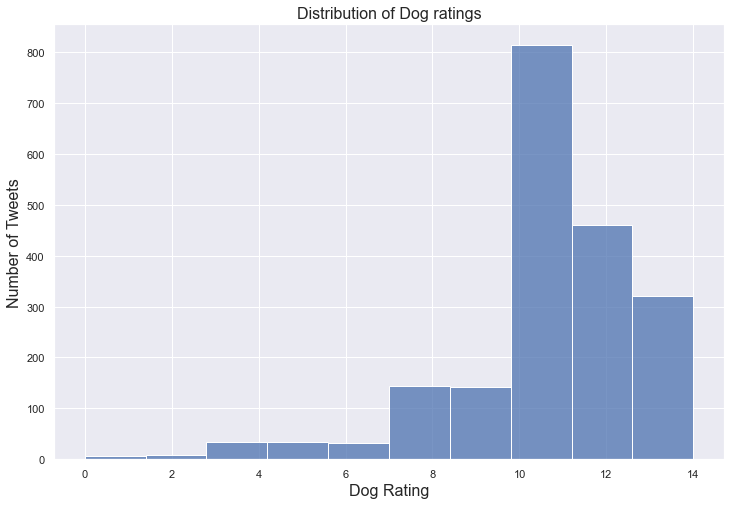

In [57]:
sb.histplot(data=twitter_archive_clean, x='dog_rating', bins=10)
plt.title('Distribution of Dog ratings', fontsize = 16)
plt.ylabel('Number of Tweets', fontsize = 16)
plt.xlabel('Dog Rating', fontsize = 16);

## This distribution is skewed to the right

### What is the top source of tweets

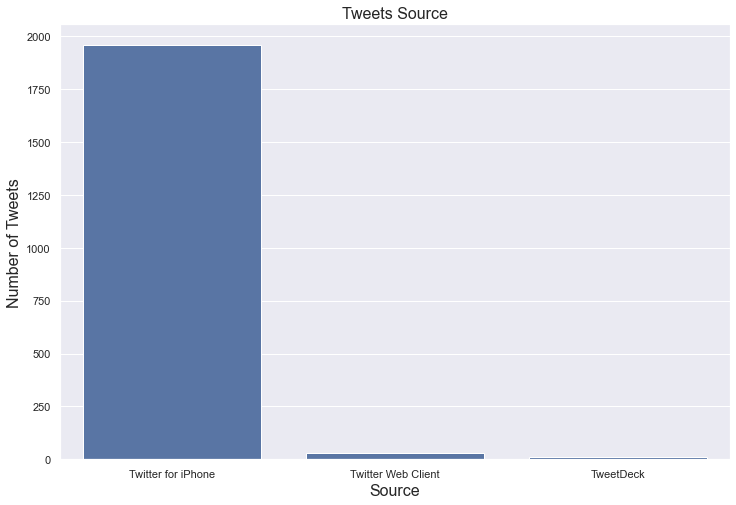

In [58]:
color_base = sb.color_palette()[0]
sb.countplot(data=twitter_archive_clean, x='source', color=color_base)
plt.title('Tweets Source', fontsize = 16)
plt.ylabel('Number of Tweets', fontsize = 16)
plt.xlabel('Source', fontsize = 16);

## Iphone users accounts for almost all the dog tweets

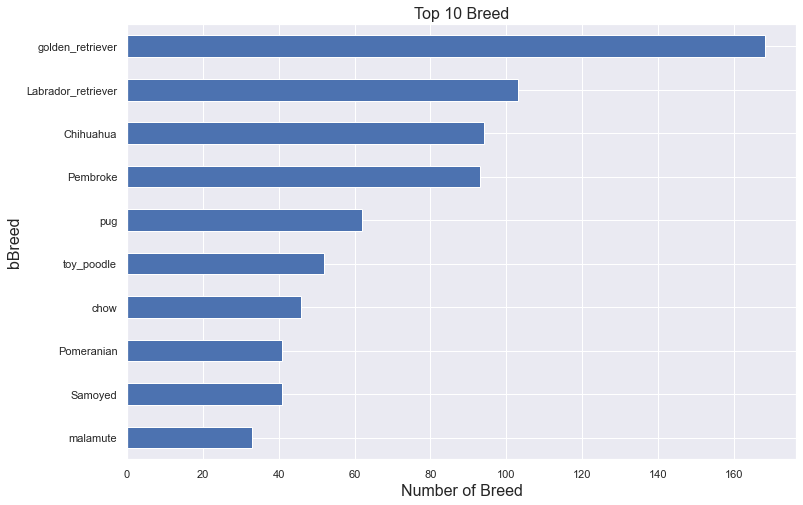

In [59]:
dog_breed = twitter_archive_clean[twitter_archive_clean['breed']!='none']['breed'].value_counts().head(10)

dog_breed.plot(kind='barh')
plt.title('Top 10 Breed', fontsize = 16)
plt.ylabel('bBreed', fontsize = 16)
plt.xlabel('Number of Breed', fontsize = 16)
plt.gca().invert_yaxis();

#### The top most comon  breed among the dogs is Golden Retriever followed by Labrador Retriever and Chihuahua

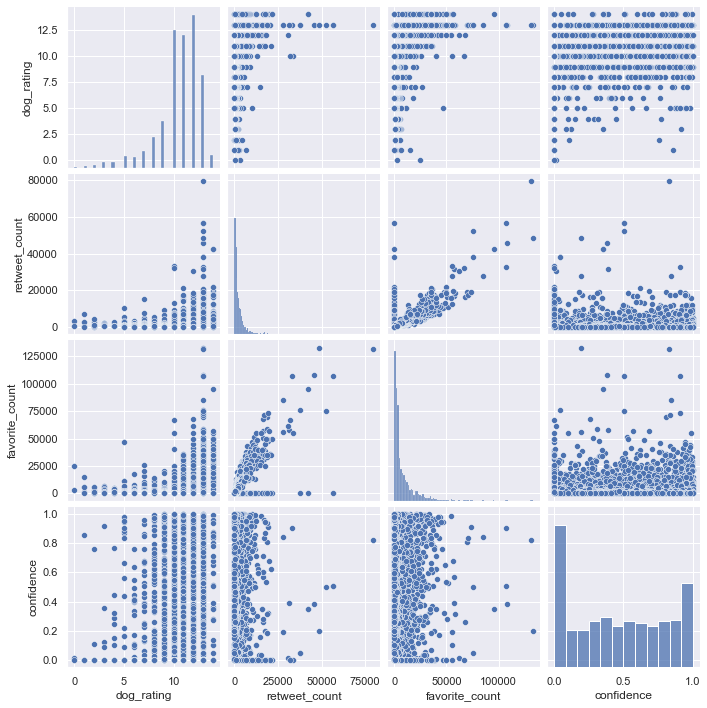

In [60]:
num_colums = ['dog_rating', 'retweet_count', 'favorite_count', 'confidence']
sb.pairplot(twitter_archive_clean, vars=num_colums);

## favorite_count has positive correlation with retweet_counts

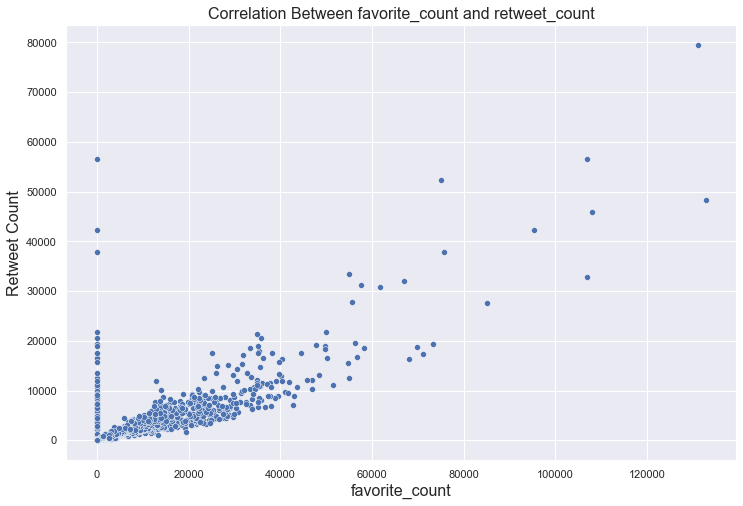

In [61]:
sb.scatterplot(data=twitter_archive_clean, x="favorite_count", y="retweet_count")
plt.title('Correlation Between favorite_count and retweet_count', fontsize = 16)
plt.ylabel('Retweet Count', fontsize = 16)
plt.xlabel('favorite_count', fontsize = 16);

In [62]:
twitter_archive_clean[['retweet_count', 'favorite_count']].corr().iloc[0,1]

0.7930186808279712

### Which dog is the top rate dog based on rating

In [63]:
top_dog_retweeted = twitter_archive_clean[twitter_archive_clean['retweet_count'] ==twitter_archive_clean['retweet_count'].max()]

In [64]:
top_dog_retweeted['jpg_url']

823    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

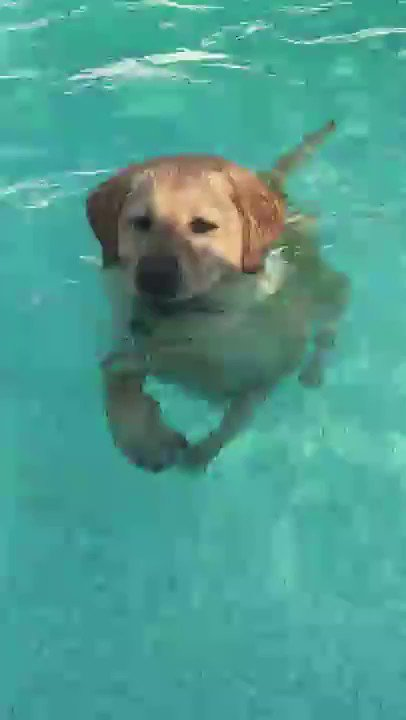

In [65]:
from IPython import display
display.Image('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')

#### Since this image is the the dog image with the highest rating, then this dog must be our winner